In [2]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1r9BARaPl-5odlOwCPE8LZJ1cFWRZGsYO?usp=sharing')

Retrieving folder list


Processing file 1-4FN7s4gsL_1D8NeeZ3A4IHL5i9qB6X4 taxi-rides.csv
Processing file 1-7QHmsGAhPpnwwi9BPhwzpRtTEONi0r6 weather.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1-4FN7s4gsL_1D8NeeZ3A4IHL5i9qB6X4
To: /media/omarkhaled/New Volume/Fcis/3rd Year Fcis/6th Semester/Machine Learning/Project/Temp/‪taxi‬‏/taxi-rides.csv
100%|██████████| 69.8M/69.8M [00:47<00:00, 1.47MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7QHmsGAhPpnwwi9BPhwzpRtTEONi0r6
To: /media/omarkhaled/New Volume/Fcis/3rd Year Fcis/6th Semester/Machine Learning/Project/Temp/‪taxi‬‏/weather.csv
100%|██████████| 350k/350k [00:00<00:00, 1.03MB/s]
Download completed


['/media/omarkhaled/New Volume/Fcis/3rd Year Fcis/6th Semester/Machine Learning/Project/Temp/\u202ataxi\u202c\u200f/taxi-rides.csv',
 '/media/omarkhaled/New Volume/Fcis/3rd Year Fcis/6th Semester/Machine Learning/Project/Temp/\u202ataxi\u202c\u200f/weather.csv']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
taxiRides = pd.read_csv('taxi-rides.csv')
weather = pd.read_csv('weather.csv')

In [3]:
print(f"Taxi Rides has {taxiRides.shape[0]} Rows and {taxiRides.shape[1]} Columns")
taxiRides.head()

Taxi Rides has 554456 Rows and 10 Columns


,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [4]:
print(f"Weather has {weather.shape[0]} Rows and {weather.shape[1]} Columns")
weather.head()

Weather has 6276 Rows and 8 Columns


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Data Cleaning

## Taxi Rides

In [5]:
taxiRides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


In [6]:
nonIntegerColumns = [col for col in taxiRides.columns if taxiRides[col].dtypes == object]
print(f"Non Integer Columns : {nonIntegerColumns}")

Non Integer Columns : ['cab_type', 'destination', 'source', 'id', 'product_id', 'name']


## Null

In [7]:
taxiRides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

## product_id and name

In [8]:
taxiRides['product_id'].value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    44204
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    44135
997acbb5-e102-41e1-b155-9df7de0a73f2    44108
6d318bcc-22a3-4af6-bddd-b409bfce1546    44038
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    44024
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43983
6c84fd89-3f11-4782-9b50-97c468b19529    43977
lyft_plus                               41142
lyft_lux                                41041
lyft                                    41015
lyft_luxsuv                             40979
lyft_premier                            40969
lyft_line                               40841
Name: product_id, dtype: int64

In [9]:
taxiRides['name'].value_counts()

UberX           44204
Taxi            44135
UberPool        44108
Black SUV       44038
WAV             44024
UberXL          43983
Black           43977
Lyft XL         41142
Lux Black       41041
Lyft            41015
Lux Black XL    40979
Lux             40969
Shared          40841
Name: name, dtype: int64

product_id and name represent the same feature so we can drop one of them

## Encoding Timestamps to date

In [10]:
weatherDate = pd.to_datetime(weather['time_stamp'], unit='s').apply(lambda x: x.strftime(('%Y-%m-%d')))

In [11]:
taxiRidesDate = pd.to_datetime(taxiRides['time_stamp'], unit='ms').apply(lambda x: x.strftime(('%Y-%m-%d')))

In [12]:
weather['date'] = weatherDate

In [13]:
taxiRides['date'] = taxiRidesDate

In [14]:
taxiRides.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price,date
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30


In [15]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16


In [16]:
taxiRides.drop(['time_stamp'],axis = 1, inplace = True)
weather.drop(['time_stamp'],axis = 1, inplace = True)

## Joining Dataframes based on date

In [17]:
mergedData = pd.merge(taxiRides,weather.drop_duplicates(subset=['date', 'location']), how = 'left', left_on=['date', 'source'], right_on=['date', 'location'])

In [18]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,id,product_id,name,price,date,temp,location,clouds,pressure,rain,humidity,wind
0,0.62,Uber,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-12-14,27.34,Haymarket Square,0.15,1033.40,NaN,0.81,3.04
1,2.27,Uber,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,2018-11-28,33.67,Beacon Hill,0.12,991.20,NaN,0.82,5.37
2,2.00,Lyft,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5,2018-12-16,42.34,Haymarket Square,1.00,1012.15,0.2068,0.77,11.49
3,3.98,Lyft,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31
4,1.49,Lyft,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0,2018-11-30,38.46,Northeastern University,0.96,1017.24,NaN,0.66,3.31


## Rain Feature

<AxesSubplot:>

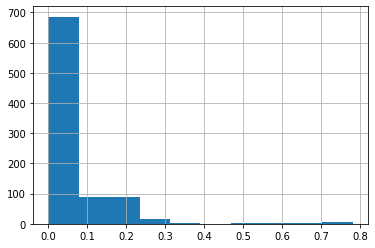

In [19]:
weather['rain'].hist()

Does null values of rain revolve around certain values?

In [20]:
weather[weather['rain'].isnull()].describe()

,temp,clouds,pressure,rain,humidity,wind
count,5382.000000,5382.000000,5382.00000,0.0,5382.000000,5382.000000
mean,38.461557,0.633618,1008.92490,NaN,0.747293,6.375199
std,6.169892,0.312919,13.46695,NaN,0.124451,3.542713
min,19.620000,0.000000,988.25000,NaN,0.450000,0.290000
25%,35.022500,0.400000,997.39000,NaN,0.660000,3.190000
50%,39.360000,0.680000,1009.56000,NaN,0.730000,6.210000
75%,41.470000,0.930000,1020.95000,NaN,0.850000,9.627500
max,55.410000,1.000000,1035.12000,NaN,0.990000,18.180000


In [21]:
weather[weather['rain'].notna()].describe()

,temp,clouds,pressure,rain,humidity,wind
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,42.876644,0.943624,1005.557405,0.057652,0.864474,9.377103
std,2.951239,0.146752,7.841618,0.100758,0.093957,3.066719
min,34.100000,0.100000,988.910000,0.000200,0.520000,1.740000
25%,41.482500,0.970000,999.750000,0.004900,0.860000,7.660000
50%,43.820000,1.000000,1005.945000,0.014850,0.900000,9.890000
75%,44.510000,1.000000,1011.237500,0.060925,0.920000,11.187500
max,51.240000,1.000000,1021.790000,0.780700,0.980000,17.160000


In [22]:
weather['rain'].value_counts()

0.0030    85
0.0020    51
0.0040    23
0.0060    17
0.0050    15
          ..
0.0337     1
0.0243     1
0.0367     1
0.0347     1
0.0281     1
Name: rain, Length: 437, dtype: int64

Rain feature nulls could indicate no rain

In [23]:
mergedData.shape

(554456, 17)

In [24]:
mergedData.isnull().sum()

distance                 0
cab_type                 0
destination              0
source                   0
surge_multiplier         0
id                       0
product_id               0
name                     0
price                44135
date                     0
temp                     0
location                 0
clouds                   0
pressure                 0
rain                480515
humidity                 0
wind                     0
dtype: int64

In [25]:
mergedData.corr()

,distance,surge_multiplier,price,temp,clouds,pressure,rain,humidity,wind
distance,1.000000,0.024511,0.345093,0.010890,-0.002783,-0.002353,-0.039473,0.002052,-0.000790
surge_multiplier,0.024511,1.000000,0.239984,-0.000994,-0.000788,-0.003530,-0.008458,-0.000201,0.001716
price,0.345093,0.239984,1.000000,0.003128,-0.001234,-0.001214,-0.011989,-0.001571,0.001184
temp,0.010890,-0.000994,0.003128,1.000000,0.565023,-0.292254,0.670202,0.370357,-0.026835
clouds,-0.002783,-0.000788,-0.001234,0.565023,1.000000,0.001757,0.328214,0.052333,0.194617
pressure,-0.002353,-0.003530,-0.001214,-0.292254,0.001757,1.000000,-0.127533,-0.068084,-0.477728
rain,-0.039473,-0.008458,-0.011989,0.670202,0.328214,-0.127533,1.000000,-0.580101,0.844514
humidity,0.002052,-0.000201,-0.001571,0.370357,0.052333,-0.068084,-0.580101,1.000000,-0.400076
wind,-0.000790,0.001716,0.001184,-0.026835,0.194617,-0.477728,0.844514,-0.400076,1.000000


In [26]:
mergedData.drop('location',axis=1,inplace=True)

In [27]:
def encode(feature):
    featureEncoder = LabelEncoder()
    featureEncoder.fit(feature)
    feature = featureEncoder.transform(feature)
    return feature

# Data Visualization

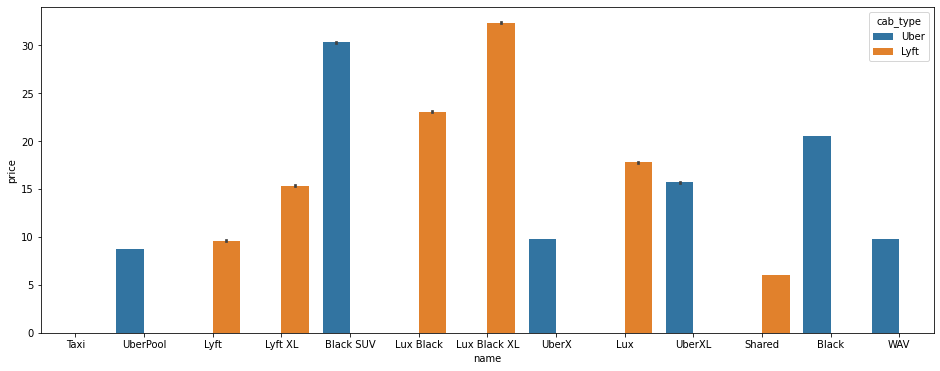

In [28]:
plt.figure(figsize =(16,6))
sns.barplot(data=mergedData,x='name',y='price',hue='cab_type')
plt.show()

Apparently all *price* values of *Taxi* are missing, could all the missing values from *price* be from the *taxi* cab type? we need to verify this

In [29]:
taxiNullValues = mergedData[mergedData['price'].isnull()]['name'].value_counts()['Taxi']
totalNullValues = mergedData.isnull().sum()['price']
print(f"There are {taxiNullValues} price null values with Taxi as cab_type from a total of {totalNullValues} \
: {taxiNullValues / totalNullValues * 100}%")

There are 44135 price null values with Taxi as cab_type from a total of 44135 : 100.0%


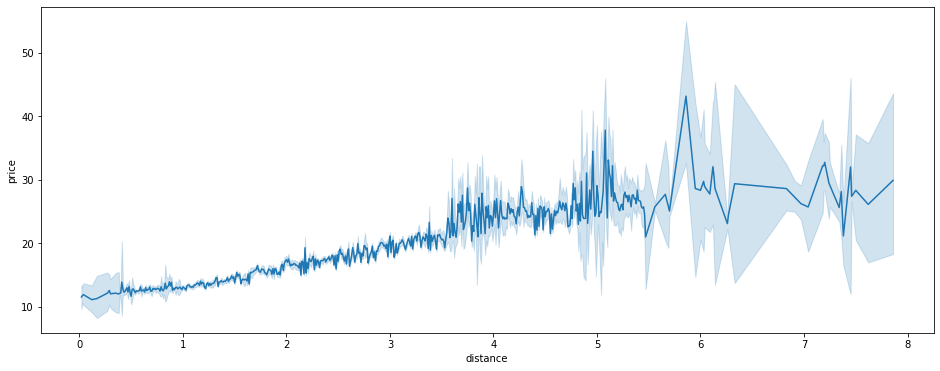

In [30]:
plt.figure(figsize =(16,6))
sns.lineplot(data=mergedData,x='distance',y='price')
plt.show()

Price as expected increases with distance, however there are some spikes that must have other factors contributing in

## Weather Graphs

<Figure size 1152x432 with 0 Axes>

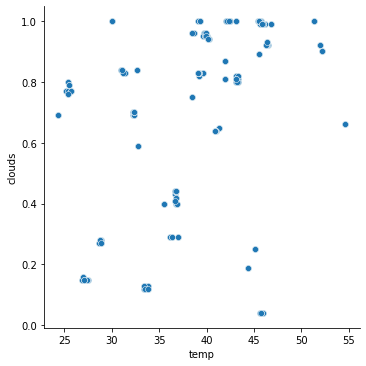

In [31]:
plt.figure(figsize =(16,6))
sns.relplot(data=mergedData,x='temp',y='clouds')
plt.show()

<Figure size 1152x432 with 0 Axes>

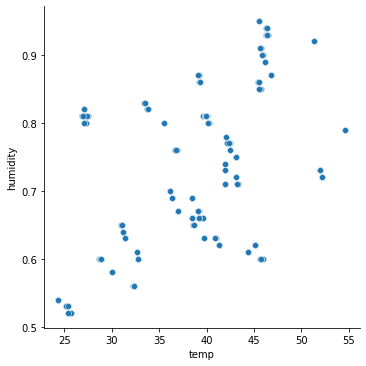

In [32]:
plt.figure(figsize =(16,6))
sns.relplot(data=mergedData,x='temp',y='humidity')
plt.show()

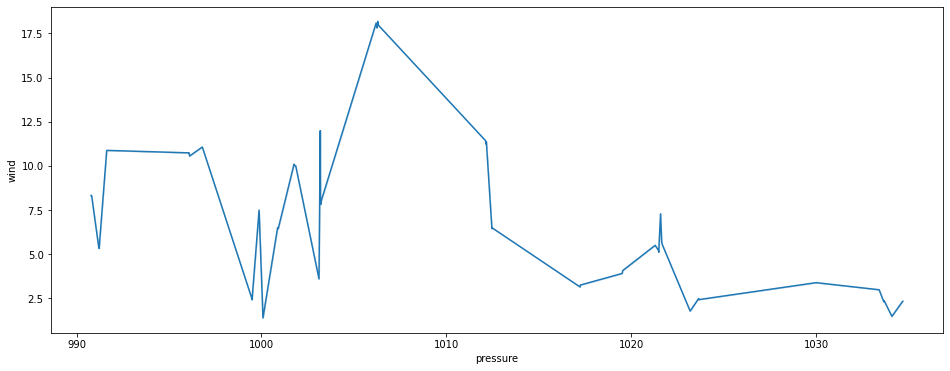

In [33]:
plt.figure(figsize =(16,6))
sns.lineplot(data=mergedData,x='pressure',y='wind')
plt.show()

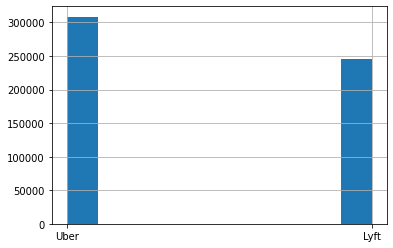

In [34]:
mergedData['cab_type'].hist()
plt.show()

<AxesSubplot:>

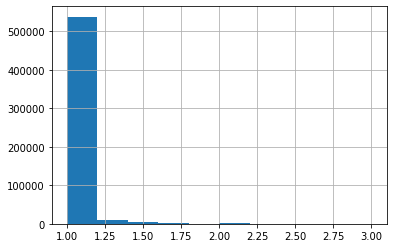

In [35]:
mergedData['surge_multiplier'].hist()

In [36]:
mergedData.dropna(axis=0, subset=['price'], inplace=True)

In [37]:
mergedData['weekday'] = pd.to_datetime(mergedData['date']).apply(lambda x: int(x.strftime('%w')))
mergedData['weekday'] = (mergedData['weekday']<5).astype(int)

In [38]:
def encode_features(X):
  for feature in nonIntegerColumns:
    X[feature] = encode(X[feature])
  return X

In [39]:
encode_features(mergedData)

,distance,cab_type,destination,source,surge_multiplier,id,product_id,name,price,date,temp,clouds,pressure,rain,humidity,wind,weekday
1,2.27,1,2,1,1.0,498229,4,8,8.0,2018-11-28,33.67,0.12,991.20,NaN,0.82,5.37,1
2,2.00,0,0,5,1.0,42132,6,5,10.5,2018-12-16,42.34,1.00,1012.15,0.2068,0.77,11.49,1
3,3.98,0,4,8,1.0,214808,10,6,22.5,2018-11-30,38.46,0.96,1017.24,NaN,0.66,3.31,0
4,1.49,0,0,8,1.0,25033,6,5,7.0,2018-11-30,38.46,0.96,1017.24,NaN,0.66,3.31,0
5,1.97,1,8,1,1.0,279921,2,1,29.5,2018-11-29,39.18,0.83,996.08,NaN,0.67,10.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.64,1,0,8,1.0,84548,3,10,13.0,2018-11-30,38.46,0.96,1017.24,NaN,0.66,3.31,0
554452,0.92,1,7,6,1.0,234588,2,1,27.5,2018-11-30,38.65,0.96,1017.23,NaN,0.65,3.13,0
554453,2.66,1,10,3,1.0,172614,3,10,16.0,2018-11-29,39.10,0.83,996.11,NaN,0.67,10.59,1
554454,2.98,1,10,2,1.0,226820,0,9,11.5,2018-12-01,36.74,0.44,1023.65,NaN,0.76,2.43,0


In [40]:
mergedData.drop(['date', 'id', 'product_id'], axis=1, inplace=True)

In [41]:
mergedData.head()

,distance,cab_type,destination,source,surge_multiplier,name,price,temp,clouds,pressure,rain,humidity,wind,weekday
1,2.27,1,2,1,1.0,8,8.0,33.67,0.12,991.20,NaN,0.82,5.37,1
2,2.00,0,0,5,1.0,5,10.5,42.34,1.00,1012.15,0.2068,0.77,11.49,1
3,3.98,0,4,8,1.0,6,22.5,38.46,0.96,1017.24,NaN,0.66,3.31,0
4,1.49,0,0,8,1.0,5,7.0,38.46,0.96,1017.24,NaN,0.66,3.31,0
5,1.97,1,8,1,1.0,1,29.5,39.18,0.83,996.08,NaN,0.67,10.69,1


In [42]:
mergedData.shape

(510321, 14)

In [43]:
mergedData['rain'].fillna(0,inplace=True)

### Model

In [44]:
def fit(dataFeatures,dataLabel):
    linearRegressionModel = linear_model.LinearRegression()
    linearRegressionModel.fit(dataFeatures,dataLabel)
    return linearRegressionModel

In [45]:
def predictLabelFor(dataFeatures):
    prediction = linearRegressionModel.predict(dataFeatures)
    return prediction

In [46]:
def split(dataFeatures,dataLabel):
    trainingDataFeatures , testingDataFeatures , trainingDataLabel , testingDataLabel = train_test_split(dataFeatures,dataLabel,shuffle=True,random_state=10,test_size=0.2)
    return  trainingDataFeatures , testingDataFeatures , trainingDataLabel , testingDataLabel

In [47]:
def calculateCostFor(dataLabel,prediction):
    return metrics.mean_squared_error(dataLabel,prediction)

In [48]:
def changeDegreeOf(dataFeatures):
     polynomialFunction = PolynomialFeatures(degree=3)
     polynomialDataFeatures = polynomialFunction.fit_transform(dataFeatures)
     return polynomialDataFeatures

In [49]:
dataFeatures = mergedData.drop('price',axis=1)
dataLabel = mergedData['price']

### First Model

In [50]:
trainingDataFeatures , testingDataFeatures , trainingDataLabel , testingDataLabel = split(dataFeatures,dataLabel)
linearRegressionModel = fit(trainingDataFeatures,trainingDataLabel)
linearTrainingDataPrediction = predictLabelFor(trainingDataFeatures)
costForTraining = calculateCostFor(trainingDataLabel,linearTrainingDataPrediction)
print(costForTraining)

42.10153954150053


In [51]:
linearTestingDataPrediction = predictLabelFor(testingDataFeatures)
costForTesting = calculateCostFor(testingDataLabel,linearTestingDataPrediction)
print(costForTesting)

42.52312721188585


### Second Model

In [52]:
polynomialDataFeatures = changeDegreeOf(dataFeatures)

In [53]:
polynomialDataFeatures.shape

(510321, 560)

In [54]:
polynomialTrainingDataFeatures , polynomialTestingDataFeatures , trainingDataLabel , testingDataLabel = split(polynomialDataFeatures,dataLabel)
linearRegressionModel = fit(polynomialTrainingDataFeatures,trainingDataLabel)
polynomialTrainingDataPrediction = predictLabelFor(polynomialTrainingDataFeatures)
costForPolynomialTraining = calculateCostFor(trainingDataLabel,polynomialTrainingDataPrediction)
print(costForPolynomialTraining)

24.68728556755045


In [55]:
polynomialTestingDataPrediction = predictLabelFor(polynomialTestingDataFeatures)
costForPolynomialTesting = calculateCostFor(testingDataLabel,polynomialTestingDataPrediction)
print(costForPolynomialTesting)

25.094771020294996


### Generate DataFrame For Results

In [58]:
def createDataFrameFor(data):
    if data == 'training':
        trainingDataFrame = pd.DataFrame()
        trainingDataFrame['trainingDataLabel'] = trainingDataLabel
        trainingDataFrame['linearModelTrainingDataPrediction'] = linearTrainingDataPrediction
        trainingDataFrame['polynomialTrainingDataPrediction'] = polynomialTrainingDataPrediction
        return trainingDataFrame
    else:    
        testingDataFrame = pd.DataFrame()
        testingDataFrame['testingDataLabel'] = testingDataLabel
        testingDataFrame['linearModelTestingDataPrediction'] = linearTestingDataPrediction
        testingDataFrame['polynomialTestingDataPrediction'] = polynomialTestingDataPrediction
        return testingDataFrame

In [59]:
typeOfData = ['training','testing']
trainingLabelDataFrame = createDataFrameFor(typeOfData[0])
testingLabelDataFrame = createDataFrameFor(typeOfData[1])

In [60]:
trainingLabelDataFrame.head()

,trainingDataLabel,linearModelTrainingDataPrediction,polynomialTrainingDataPrediction
284842,7.0,5.806079,10.863944
541987,28.0,31.179986,29.139024
263230,16.0,20.660242,14.662902
210962,5.0,12.216198,4.754911
379424,3.0,10.111093,3.388359


In [61]:
testingLabelDataFrame.head()

,testingDataLabel,linearModelTestingDataPrediction,polynomialTestingDataPrediction
252332,9.5,10.134038,8.699001
531185,10.0,11.190347,10.725656
28301,16.5,14.985552,17.212624
283168,7.0,7.342667,7.118703
339762,7.0,5.064698,10.499576
